(3, 28, 28)


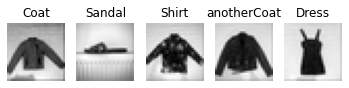

In [9]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
from matplotlib import image
import scipy.signal
import numpy as np
images = ['Coat','Sandal','Shirt','anotherCoat','Dress']
      
axes=[]
fig=plt.figure()
fig.set_size_inches(6, 2)
i = 0

data = []
data1 = []
for img in images:
    axes.append(fig.add_subplot(1, 5, i+1) )
    subplot_title=(img)
    axes[-1].set_title(subplot_title)
    axes[-1].axis('off')
    image = Image.open(img+'.jpg')
    
    for x in range(0, image.size[0]-1):
        for j in range(0, image.size[1]-1):
            pixelColorVals = image.getpixel((x,j));
            # Invert color
            redPixel    = 255 - pixelColorVals[0]; # Negate red pixel
            greenPixel  = 255 - pixelColorVals[1]; # Negate green pixel
            bluePixel   = 255 - pixelColorVals[2]; # Negate blue pixel
            # Modify the image with the inverted pixel values
            image.putpixel((x,j),(redPixel, greenPixel, bluePixel));
    gs_image = image.convert(mode='L')    
    img_resized =gs_image.resize((28,28),Image.ANTIALIAS)
    img_resized.save(img+str(2)+'.jpg',quality=100)
    imgd = np.asarray(img_resized)
    imgd = imgd / 255.0
    data.append(imgd)
    #plt.imshow(img_resized,cmap='gray')
    plt.imshow(img_resized,cmap=plt.cm.binary)
    i += 1

npdata = np.stack((data[0], data[1]))
c = np.expand_dims(data[2], axis=0)
mytest = np.concatenate((npdata, c), axis=0)
print(mytest.shape)
    
plt.show()

im = Image.open('Sandal2.jpg')
im_mirror = ImageOps.mirror(im)
im_mirror.save('Sandal2_mirror.jpg', quality=95)

# reshape dataset to have a single channel
#testX = testX.reshape((testX.shape[0], 28, 28, 1))
# one hot encode target values
#testY = to_categorical(testY)
